# Convolutional Neural Network (CNN)

## Resources

    CNN : https://en.wikipedia.org/wiki/Convolutional_neural_network
    Pytorch : https://pytorch.org/tutorials/beginner/basics/intro.html

Start by importing both the training and testing MNIST datasets using DataLoaders and the torchvision provided datasets. You can set both the training and testing batch size to be whatever you feel is best.

In [1]:
import torch
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.dataloader import DataLoader

import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Downloading MNIST dataset from Pytorch
dataset = datasets.MNIST(
    root="./data",
    download=True,
    train=True,
    transform=transforms.ToTensor(),
)

In [11]:
# Splitting the dataset into training and testing set
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [50000, 10000])

/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


Text(0.5, 1.0, 'Label : 3')

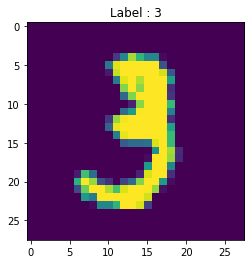

In [12]:
# Visualizing a sample from dataset
plt.imshow(train_dataset.dataset.data[10])
plt.title("Label : " + str(train_dataset.dataset.train_labels[10].item()))

In [13]:
# Creating a DataLoader for training and testing
train = DataLoader(train_dataset, batch_size=32, shuffle=True)
test = DataLoader(test_dataset, batch_size=1, shuffle=True)

Define a network with the following architecture:

Conv2d (input channels=1, output channels = 15,kernel size = 5)
$\rightarrow$
MaxPool (kernel size = 2)
$\rightarrow$
ReLU
$\rightarrow$
Conv2d (input channels=15, output channels = 30,kernel size = 5)
$\rightarrow$
Dropout2d (p = 0.5)
$\rightarrow$
MaxPool (kernel size = 2)
$\rightarrow$
ReLU
$\rightarrow$
Linear(input dimension = 480, hidden units = 64)
$\rightarrow$
ReLU
$\rightarrow$
Dropout (p=0.5)
$\rightarrow$
Linear(input dimension = 64, hidden units = 10)
$\rightarrow$
LogSoftMax

In [7]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 15, kernel_size=5),
            nn.MaxPool2d(2, 2),
            nn.ReLU(),
            nn.Conv2d(15, 30, kernel_size=5),
            nn.Dropout2d(0.5),
            nn.MaxPool2d(2, 2),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(480, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 10),
            nn.LogSoftmax(dim=1),
        )

    def forward(self, x):
        return self.cnn(x)

Train the network you defined in the previous question on MNIST, using the optimizer and the number of training epochs you deem appropriate. Use a cross-entropy loss. Each epoch test your model on the testing dataset and print the value of the accuracy that you achieve. 



In [8]:
batch_size = 32

model = CNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Running the model on GPU if available
## Refer pytorch documentation for more details about copying model and data onto the device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

cost = []
epochs = 10

# Training the model
for epoch in range(epochs):

    loss_epoch = []
    train_acc = []

    for x, y in train:

        # Predicting the output
        y_pred = model(x.to(device))

        # Converting the predicted output from one hot encoding to a single number
        _, t_preds = torch.max(y_pred, dim=1)

        # Calculating the training accuracy
        train_acc.append(
            torch.tensor(torch.sum(t_preds == y.to(device)).item() / len(t_preds))
        )

        # Calculating the loss
        loss = F.cross_entropy(y_pred, y.type(torch.LongTensor).to(device))

        # Backpropagation

        # Zeroing the gradients
        optimizer.zero_grad()

        # Calculating the gradients
        loss.backward()

        # Updating the weights
        optimizer.step()

        # Appending the loss of each batch to the epoch loss
        loss_epoch.append(loss.item())

    # Calculating test accuracy
    with torch.no_grad():
        if epoch % 1 == 0:
            test_acc = []
            for x, y in test:
                y_pred = model(x.to(device))
                _, t_preds = torch.max(y_pred, dim=1)
                test_acc.append(
                    torch.tensor(
                        torch.sum(t_preds == y.to(device)).item() / len(t_preds)
                    )
                )

            print(
                "Epoch :{} Loss : {} Train Accuracy:{} Test Accuracy : {}".format(
                    epoch,
                    sum(loss_epoch) / len(loss_epoch),
                    sum(train_acc) / len(train_acc),
                    sum(test_acc) / len(test_acc),
                )
            )

    cost.append(sum(loss_epoch) / len(loss_epoch))

/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch :0 Loss : 0.44618519723548844 Train Accuracy:0.8599048256874084 Test Accuracy : 0.9340000152587891
Epoch :1 Loss : 0.20212347584169404 Train Accuracy:0.9430182576179504 Test Accuracy : 0.9490000009536743
Epoch :2 Loss : 0.16394136824853056 Train Accuracy:0.952215313911438 Test Accuracy : 0.9531000256538391
Epoch :3 Loss : 0.14257464571382256 Train Accuracy:0.9595929384231567 Test Accuracy : 0.9588000178337097
Epoch :4 Loss : 0.12598471959617277 Train Accuracy:0.9644113779067993 Test Accuracy : 0.9648000001907349
Epoch :5 Loss : 0.11733871379403024 Train Accuracy:0.9659308791160583 Test Accuracy : 0.9660000205039978
Epoch :6 Loss : 0.11000267015220401 Train Accuracy:0.9681901931762695 Test Accuracy : 0.9664999842643738
Epoch :7 Loss : 0.10582590816269605 Train Accuracy:0.9684301018714905 Test Accuracy : 0.9631999731063843
Epoch :8 Loss : 0.09624670598793283 Train Accuracy:0.9711892008781433 Test Accuracy : 0.9706000089645386
Epoch :9 Loss : 0.09422491162643551 Train Accuracy:0.972

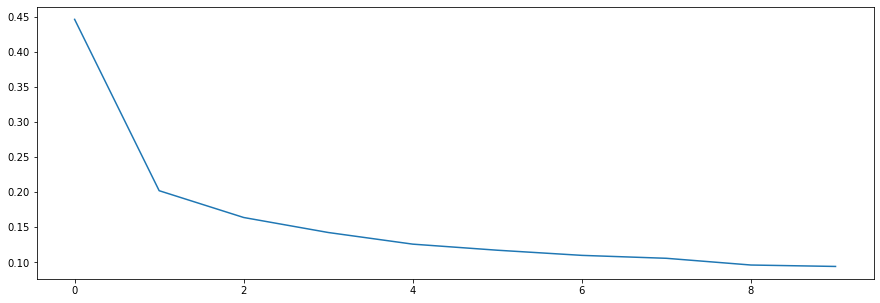

In [14]:
### Plotting the cost vs epochs
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(np.array(cost))